## Learning to identify MNIST digits using Flux.jl
Video at: https://www.youtube.com/watch?v=zmlulaxatRs

In [3]:
using Flux, Images, MLDatasets
using Flux: crossentropy, onecold, onehotbatch, train!, params
using LinearAlgebra, Random, Statistics
using Plots

In [4]:
# set random seed
Random.seed!(3145926)

TaskLocalRNG()

In [9]:
X_train_raw, y_train_raw = MLDatasets.MNIST(:train)[:]
X_test_raw, y_test_raw = MLDatasets.MNIST(:test)[:]

# view training data
idx = 7
img = X_train_raw[:,:,idx]
colorview(Gray, img') #' is the transpose
y_train_raw[idx]



1

In [8]:

# Flatten data
X_train = Flux.flatten(X_train_raw)
X_test = Flux.flatten(X_test_raw)

# one-hot encoding
y_train = onehotbatch(y_train_raw, 0:9)
y_test = onehotbatch(y_test_raw,0:9);


In [10]:
model = Chain(
    Dense(28*28, 32, relu),
    Dense(32, 10),
    softmax
)

loss(x,y) = crossentropy(model(x), y)

ps = params(model) # initialize all parameters

Params([Float32[-0.07609152 -0.022135524 … -0.04383638 -0.019425213; 0.025773196 0.018217307 … -0.042837396 0.009674247; … ; 0.04904932 -0.030426864 … 0.0045015933 0.046433646; -0.043875277 0.030675689 … -0.0068702814 -0.01741067], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[0.3253224 0.27212146 … -0.27044222 0.3614776; 0.21576585 -0.10869002 … 0.36712715 -0.37256953; … ; -0.054135114 -0.060019497 … 0.25172493 -0.3443819; -0.080315456 0.29158914 … 0.23312558 0.36601818], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [11]:
learning_rate = 0.01
opt = ADAM(learning_rate)

Adam(0.01, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [12]:
loss_history = []

epochs = 500

for epoch in 1:epochs
    train!(loss, ps, [(X_train, y_train)], opt)
    train_loss = loss(X_train, y_train)
    push!(loss_history, train_loss)
    println("Epoch = $epoch: Training Loss = $train_loss")
end


Epoch = 1: Training Loss = 2.1006792
Epoch = 2: Training Loss = 1.7492433
Epoch = 3: Training Loss = 1.4560428
Epoch = 4: Training Loss = 1.2031333
Epoch = 5: Training Loss = 1.0113645
Epoch = 6: Training Loss = 0.86868423
Epoch = 7: Training Loss = 0.7453033
Epoch = 8: Training Loss = 0.6604776
Epoch = 9: Training Loss = 0.60097045
Epoch = 10: Training Loss = 0.5483925
Epoch = 11: Training Loss = 0.5104268
Epoch = 12: Training Loss = 0.4789248
Epoch = 13: Training Loss = 0.4555633
Epoch = 14: Training Loss = 0.43643358
Epoch = 15: Training Loss = 0.4186014
Epoch = 16: Training Loss = 0.40676656
Epoch = 17: Training Loss = 0.39595047
Epoch = 18: Training Loss = 0.38373366
Epoch = 19: Training Loss = 0.3747382
Epoch = 20: Training Loss = 0.36710262
Epoch = 21: Training Loss = 0.35886386
Epoch = 22: Training Loss = 0.35150564
Epoch = 23: Training Loss = 0.34505332
Epoch = 24: Training Loss = 0.33904096
Epoch = 25: Training Loss = 0.3335481
Epoch = 26: Training Loss = 0.3275922
Epoch = 27

In [13]:
# make predictions
y_hat_raw = model(X_test)
y_hat = onecold(y_hat_raw) .- 1
y = y_test_raw
mean(y_hat .== y) # doggo got 96.24%
# CNN gets 99.83% according to wikipedia

0.9572

In [14]:
# display results
check = [y_hat[i] == y[i] for i in 1:length(y)]
index = collect(1:length(y))
check_display = [index y_hat y check]

# This is a nice way of interactively displaying data. 
# Suppose we could use Pandas as well.
vscodedisplay(check_display)


In [ ]:
misclass_index=9

img = X_test_raw[:,:,misclass_index]

colorview(Gray, img')
y[misclass_index]
y_hat[misclass_index]

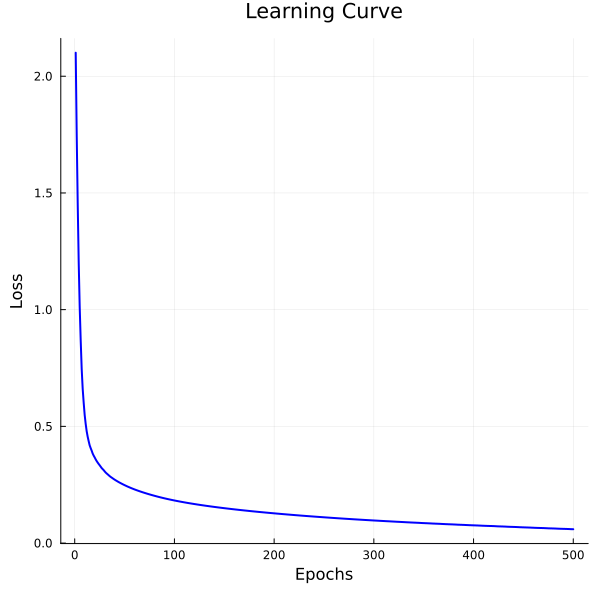

In [15]:
gr(size = (600,600))
pl = plot(1:epochs, loss_history, xlabel="Epochs", ylabel="Loss", title="Learning Curve", legend=false,
    color=:blue, linewidth=2)